<a href="https://colab.research.google.com/github/chho-work/syntheticReplica/blob/main/sample_nbs/Sample_nb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

This notebook is the continuation of ["Sample-nb-1.ipynb"](provide the link to nb).  For introduction and demo of visualization features, please see "Sample-nb-1.ipynb".<br>

In this notebook we start by reproducing the example in "Sample-nb-1.ipynb", followed by introduction of the methods to paste foreground images on background image,visualize the outputs image, and convert to COCO formats.  


### Setup

In [1]:
# Clone imageReplica repo, which contains all the necessary images for demo in this notebook.
!git clone https://github.com/chho-work/syntheticReplica.git

Cloning into 'syntheticReplica'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 600 (delta 35), reused 39 (delta 21), pack-reused 538
Receiving objects: 100% (600/600), 176.32 MiB | 37.48 MiB/s, done.
Resolving deltas: 100% (334/334), done.


In [2]:
# Change to imageReplica directory and list its contents.
%cd /content/syntheticReplica
!ls

/content/syntheticReplica
00_core.ipynb		      assets	       MANIFEST.in
01_utils.ipynb		      CONTRIBUTING.md  README.md
02_display.ipynb	      docs	       sample_nbs
03_dirView.ipynb	      images	       settings.ini
04_generate_coordinate.ipynb  index.ipynb      setup.py
05_imageTools.ipynb	      LICENSE	       syntheticReplica
06_toolsCOCO.ipynb	      Makefile


### Import Library

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
%matplotlib inline 

from pathlib import Path
from syntheticReplica.dirView import *
from syntheticReplica.display import *
from syntheticReplica.core import *
from syntheticReplica.utils import *
from syntheticReplica.imageTools import *

### Create Path to Data

In [4]:
# base path
base = Path('/content/syntheticReplica/images')

# path to background_images directory 
back = base.joinpath('background_images')
petri_path = back.joinpath('petri')

# path to foreground_images directory 
fore = base.joinpath('foreground_images')
disk_path = fore.joinpath('disk_only')
zone_path = fore.joinpath('zone_only')

# path to sample synthetic_images directory
sample_img = base.joinpath('sample')

# path to annotation files
content_tmp = Path('/content/tmp')
content_tmp.mkdir(parents=True, exist_ok=True)
file_csv = content_tmp.joinpath('annotDataFrame.csv')

# path to synthetic images directory which will be our training image
content = Path('/content')
train_img = content.joinpath('train_synthetic')
train_img.mkdir(parents=True, exist_ok=True)

# path to coco annotated json files
coco_annot_path = content.joinpath('coco_annotation')
coco_annot_path.mkdir(parents=True, exist_ok=True)

### Visualize Foreground and Background Images

We have available the following types of foreground pictures:
* disk images only
* zone images only 
* petri dish only


In [5]:
# Verify if all files in foreground_images/disk_only are image files.
showDirInf(disk_path)

0: disk_AML25.png
1: disk_CAZ30.png
2: disk_CT25.png
3: disk_ENR5.png
4: disk_L2.png
5: disk_SPT100.png
6: disk_TE30.png

Path to files: "/content/syntheticReplica/images/foreground_images/disk_only"
Total number of items found: 7
All images are ready to display, please proceed!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_AML25.png
Image Size: (72, 73) (H x W)


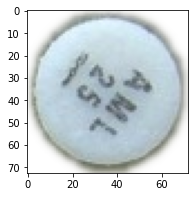

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_CAZ30.png
Image Size: (77, 75) (H x W)


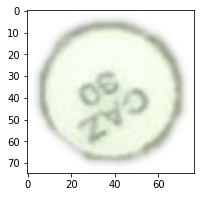

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_CT25.png
Image Size: (80, 82) (H x W)


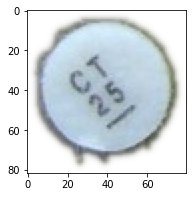

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_ENR5.png
Image Size: (82, 80) (H x W)


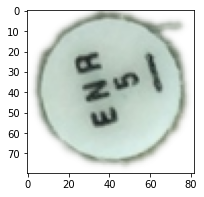

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_L2.png
Image Size: (76, 85) (H x W)


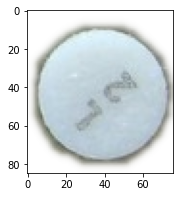

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_SPT100.png
Image Size: (79, 79) (H x W)


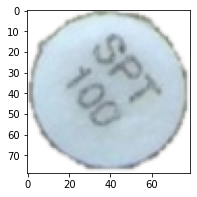

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: disk_TE30.png
Image Size: (79, 82) (H x W)


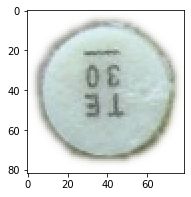

<IPython.core.display.Javascript object>

In [6]:
# Display all images in foreground_images/disk_only
displayTarBarImage(disk_path, 0, 7)

In [7]:
# Verify if all files in foreground_images/zone_only are image files.
showDirInf(zone_path)

0: zone_1_189x200.png
1: zone_1_246x260_100.png
2: zone_2_188x154.png
3: zone_2_300x266_90.png
4: zone_3_226x199.png
5: zone_3_264x300_90.png
6: zone_4_111x119.png
7: zone_4_230x247_90.png

Path to files: "/content/syntheticReplica/images/foreground_images/zone_only"
Total number of items found: 8
All images are ready to display, please proceed!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_1_189x200.png
Image Size: (189, 200) (H x W)


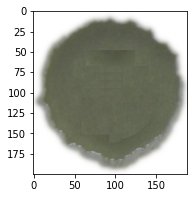

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_1_246x260_100.png
Image Size: (310, 298) (H x W)


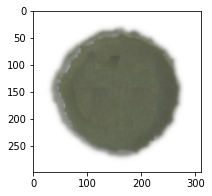

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_2_188x154.png
Image Size: (188, 154) (H x W)


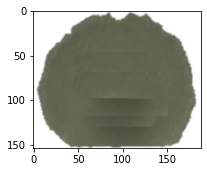

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_2_300x266_90.png
Image Size: (266, 300) (H x W)


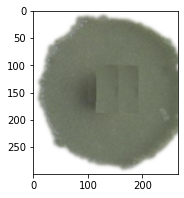

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_3_226x199.png
Image Size: (226, 199) (H x W)


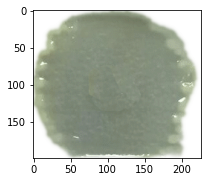

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_3_264x300_90.png
Image Size: (264, 300) (H x W)


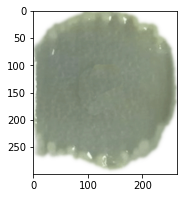

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_4_111x119.png
Image Size: (111, 119) (H x W)


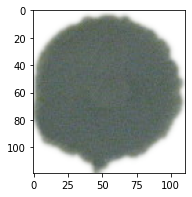

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: zone_4_230x247_90.png
Image Size: (230, 247) (H x W)


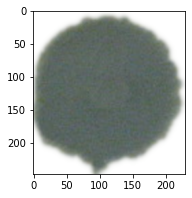

<IPython.core.display.Javascript object>

In [8]:
# Display all images in foreground_images/zone_only
displayTarBarImage(zone_path, 0, 8)

In [9]:
# Verify if all files in foreground_images/disk_only are image files.
showDirInf(petri_path)

0: empty_petri_54.jpg
1: empty_petri_58.jpg
2: empty_petri_9.jpg

Path to files: "/content/syntheticReplica/images/background_images/petri"
Total number of items found: 3
All images are ready to display, please proceed!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: empty_petri_54.jpg
Image Size: (1875, 1423) (H x W)


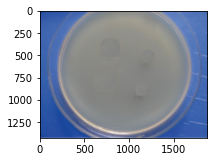

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: empty_petri_58.jpg
Image Size: (980, 921) (H x W)


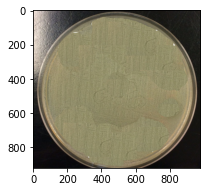

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: empty_petri_9.jpg
Image Size: (980, 754) (H x W)


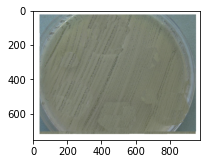

<IPython.core.display.Javascript object>

In [10]:
# Display all images in background_images
displayTarBarImage(petri_path, 0, 3)

### Positioning Foreground Images

* Position the foreground images in the desired locations.
* Select and mark a location.
* Mark the boundaries with lines(x and y axis) to record the locations to paste foreground images.
* Visualize background image with boundaries. 

In this section, we select an image of pretri dish(background image) and plot the different lines to visualize the locations where we want to paste the foreground images(disk and zone).  

In [11]:
# Create object
view_9 = PreviewFore(petri_path, file_csv, 'empty_petri_9.jpg')

#### Example 1: Plot 2 locations

We start by using the following coordinates to plot the lines:
1. 
index = "B0"
init_pto = [250, 150]
expand_x = 300
expand_y = 200
2. 
index = "B1"
init_pto = [550, 350]
expand_x = 200
expand_y = 200


    init_pto_x  init_pto_y  expand_x  expand_y
B0         250         150       300       200
B1         550         350       200       200


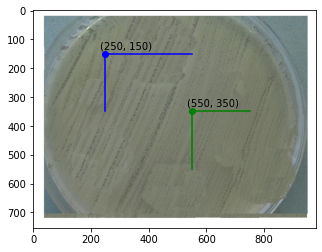

In [13]:
index = "B1"
init_pto = [550, 350]
expand_x = 200
expand_y = 200

view_9.adPto(index, init_pto, expand_x, expand_y)

#### Set Parameters
* **Attention:<br> 
1) Execute this cell before you start composing images.<br>
2) Execute this cell each time after you remove all image files from "train_synthetic" directory.**<br>

In [14]:
background_petri_9 = petri_path.joinpath('empty_petri_9.jpg')
background_img = listFile(petri_path)

fore = base.joinpath('foreground_images')
disk = fore.joinpath('disk_only')
zone = fore.joinpath('zone_only')
fore_disk = listFile(disk)
fore_zone = listFile(Path(zone))

#### Compose Images

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: composite_antibiogram_1_1.jpg
Image Size: (980, 754) (H x W)


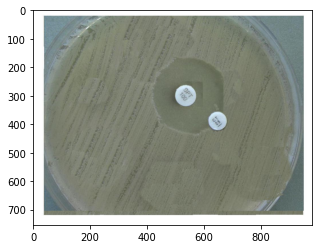

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: composite_antibiogram_1_2.jpg
Image Size: (980, 754) (H x W)


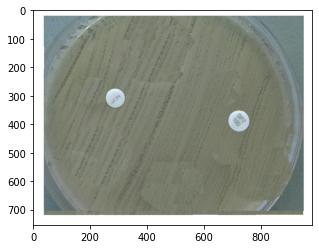

<IPython.core.display.Javascript object>

0: composite_antibiogram_1_1.jpg
1: composite_antibiogram_1_2.jpg

Path to files: "/content/train_synthetic"
Total number of items found: 2
All images are ready to display, please proceed!


In [16]:
image_id_1 = 2 # must be int and the first image of each session must start with 1, 2, ...
fname_train_1 = "composite_antibiogram_1_" + str(image_id_1) + ".jpg"
fname_annot_1 = "composite_antibiogram_1_" + str(image_id_1) + ".json"
build_1 = SyntheticImageBuild(image_id_1, fname_train_1, train_img, background_petri_9, file_csv, fore_zone, fore_disk)
build_1.buildImage()
build_1.json2coco(coco_annot_path, fname_annot_1)
displayTarBarImage(train_img, 0, image_id_1, start_last=True, figsize=(5, 5))
showDirInf(train_img)

In [17]:
# Zip all created contents, both images and annotations.
!zip -r /content/annotation_1.zip /content/coco_annotation
!zip -r /content/train_1.zip /content/train_synthetic

  adding: content/coco_annotation/ (stored 0%)
  adding: content/coco_annotation/composite_antibiogram_1_2.json (deflated 82%)
  adding: content/coco_annotation/composite_antibiogram_1_1.json (deflated 86%)
  adding: content/train_synthetic/ (stored 0%)
  adding: content/train_synthetic/composite_antibiogram_1_1.jpg (deflated 4%)
  adding: content/train_synthetic/composite_antibiogram_1_2.jpg (deflated 4%)


In [ ]:
# Download synthetic images to your local drive
from google.colab import files
files.download("/content/annotation_1.zip")
files.download("/content/train_1.zip")

In [20]:
# Remove all files from train_synthetic directory
rmFileExt(train_img, ".jpg")
rmDir(train_img,".ipynb_checkpoints")
rmFileExt(Path('/content'), ".zip")

All ".jpg" removed!
"/content/annotation_1.zip"" removed!
"/content/train_1.zip"" removed!
All ".zip" removed!


In [21]:
# Remove all json fiiels from coco_annotation directory
rmFileExt(coco_annot_path, ".json")
rmDir(coco_annot_path,".ipynb_checkpoints")

"/content/coco_annotation/composite_antibiogram_1_1.json"" removed!
"/content/coco_annotation/composite_antibiogram_1_2.json"" removed!
All ".json" removed!


#### Example 2: plot 4 locations


In [22]:
view_54 = PreviewFore(petri_path, file_csv, 'empty_petri_54.jpg')

In this second example, we will plot 4 locations
1. 
index = "pto_0"
init_pto = [650, 250]
expand_x = 100
expand_y = 100
2. 
index = "pto_1"
init_pto = [1100, 350]
expand_x = 200
expand_y = 200
3. 
index = "pto_2"
init_pto = [550, 700]
expand_x = 200
expand_y = 200
4. 
index = "pto_3"
init_pto = [1000, 900]
expand_x = 200
expand_y = 200


       init_pto_x  init_pto_y  expand_x  expand_y
pto_0         650         250       100       100
pto_1        1100         350       200       200
pto_2         550         700       200       200
pto_3        1000         900       200       200


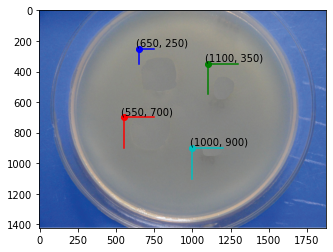

In [26]:
index = "pto_3"
init_pto = [1000, 900]
expand_x = 200
expand_y = 200

view_54.adPto(index, init_pto, expand_x, expand_y)

#### Build Synthetic Images

In [27]:
background_petri_54 = petri_path.joinpath('empty_petri_54.jpg')
background_img = listFile(petri_path)

fore = base.joinpath('foreground_images')
disk = fore.joinpath('disk_only')
zone = fore.joinpath('zone_only')
fore_disk = listFile(disk)
fore_zone = listFile(Path(zone))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: composite_antibiogram_2_1.jpg
Image Size: (1875, 1423) (H x W)


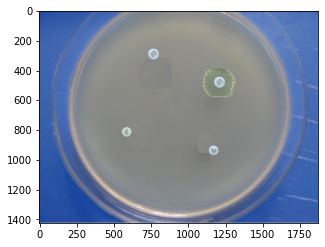

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File name: composite_antibiogram_2_2.jpg
Image Size: (1875, 1423) (H x W)


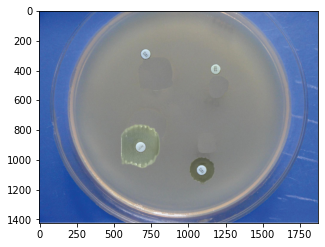

<IPython.core.display.Javascript object>

0: composite_antibiogram_2_1.jpg
1: composite_antibiogram_2_2.jpg

Path to files: "/content/train_synthetic"
Total number of items found: 2
All images are ready to display, please proceed!


In [29]:
image_id_2 = 2 # must be int and start with 1, 2, 3,
fname_train_2 = "composite_antibiogram_2_" + str(image_id_2) + ".jpg"
fname_annot_2 = "composite_antibiogram_2_" + str(image_id_2) + ".json"
build_2 = SyntheticImageBuild(image_id_2, fname_train_2, train_img, background_petri_54, file_csv, fore_zone, fore_disk)
build_2.buildImage()
build_2.json2coco(coco_annot_path, fname_annot_2)
displayTarBarImage(train_img, 0, image_id_2, start_last=True, figsize=(5, 5))
showDirInf(train_img)

In [30]:
# Zip all created contents, both images and annotations.
!zip -r /content/annotation_2.zip /content/coco_annotation
!zip -r /content/train_2.zip /content/train_synthetic

  adding: content/coco_annotation/ (stored 0%)
  adding: content/coco_annotation/composite_antibiogram_2_1.json (deflated 87%)
  adding: content/coco_annotation/composite_antibiogram_2_2.json (deflated 88%)
  adding: content/train_synthetic/ (stored 0%)
  adding: content/train_synthetic/composite_antibiogram_2_1.jpg (deflated 3%)
  adding: content/train_synthetic/composite_antibiogram_2_2.jpg (deflated 3%)


In [ ]:
# Download synthetic images to your local drive
from google.colab import files
files.download("/content/annotation_2.zip")
files.download("/content/train_2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Remove all files from train_synthetic directory
rmFileExt(train_img, ".jpg")
rmDir(train_img,".ipynb_checkpoints")
rmFileExt(Path("/content"), ".zip")

"/content/train_synthetic/composite_antibiogram_2_1.jpg"" removed!
"/content/train_synthetic/composite_antibiogram_2_2.jpg"" removed!
All ".jpg" removed!
"/content/annotation_2.zip"" removed!
"/content/train_2.zip"" removed!
All ".zip" removed!


In [32]:
# Remove all json fiiels from coco_annotation directory
rmFileExt(coco_annot_path, ".json")
rmDir(coco_annot_path,".ipynb_checkpoints")

"/content/coco_annotation/composite_antibiogram_2_1.json"" removed!
"/content/coco_annotation/composite_antibiogram_2_2.json"" removed!
All ".json" removed!
